In [1]:
from scipy import stats

In [2]:
num_heads = 16
num_flips = 20
prob_head = .5

In [3]:
prob = stats.binomtest(num_heads, num_flips, prob_head)

In [4]:
prob.pvalue

0.01181793212890625

In [5]:
prob_16_heads = stats.binom.pmf(num_heads, num_flips, prob_head)

In [6]:
probabilities = stats.binom.pmf([4, 16], num_flips, prob_head)

In [7]:
sum(probabilities) == 2 * prob_16_heads

True

In [8]:
interval_all_counts = range(21)

In [9]:
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)

In [10]:
total_probs = probabilities.sum()

In [11]:
f"Total sum of probabilities equals {total_probs:.14f}"

'Total sum of probabilities equals 1.00000000000000'

In [12]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt

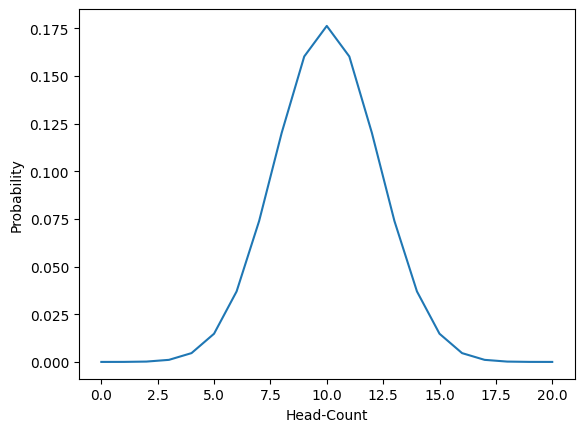

In [14]:
plt.xlabel('Head-Count')
plt.ylabel('Probability')
plt.plot(interval_all_counts, probabilities)

In [15]:
flip_counts = [20, 80, 140, 200]
linestyles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'k']

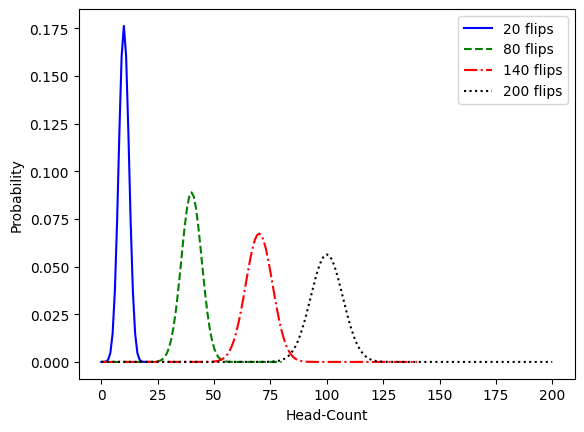

In [16]:
plt.xlabel('Head-Count')
plt.ylabel('Probability')
for flip_count, linestyle, color in zip(flip_counts, linestyles, colors):
    interval_all_counts = range(flip_count + 1)
    probabilities = stats.binom.pmf(interval_all_counts, flip_count, prob_head)
    plt.plot(interval_all_counts, probabilities, linestyle=linestyle, color=color, label=f'{flip_count} flips')
plt.legend()

In [17]:
import numpy as np

In [18]:
measurements = np.array([80, 77, 73, 61, 74, 79, 81])

In [19]:
measurements.sort()

In [20]:
measurements

array([61, 73, 74, 77, 79, 80, 81])

In [21]:
number_of_days = measurements.size

In [22]:
number_of_days

7

Text(0, 0.5, 'Temperature')

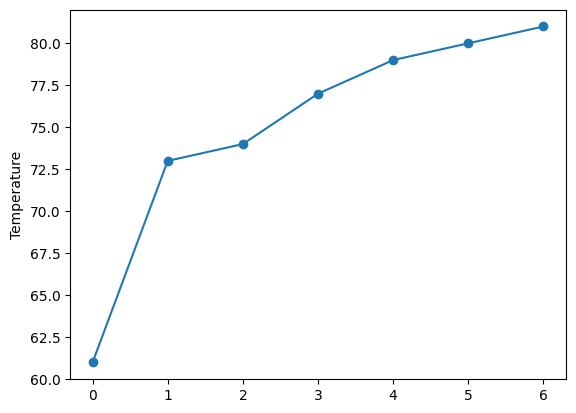

In [23]:
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.ylabel('Temperature')

In [24]:
difference = measurements.max() - measurements.min()
midpoint = measurements.min() + difference / 2
assert midpoint == (measurements.max() + measurements.min()) / 2
print(f"The midpoint temperature is {midpoint} degrees")

The midpoint temperature is 71.0 degrees


Text(0, 0.5, 'Temperature')

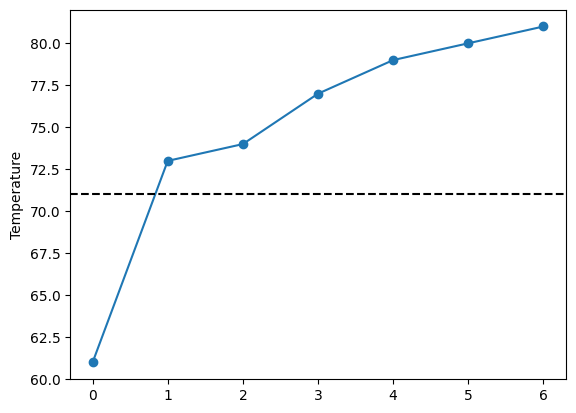

In [25]:
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--')
plt.ylabel('Temperature')

In [26]:
median = measurements[3]

Text(0, 0.5, 'Temperature')

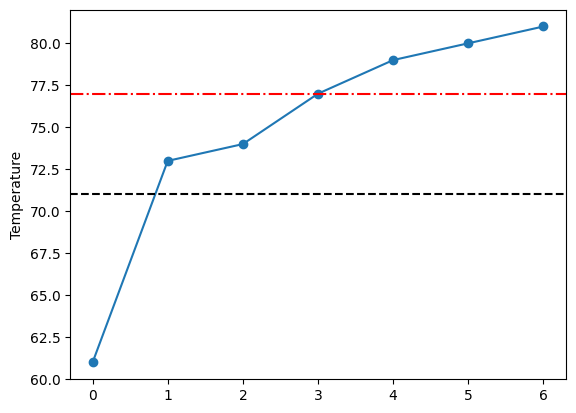

In [27]:
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--', label='Midpoint')
plt.axhline(median, color='r', linestyle='-.', label='Median')
plt.ylabel('Temperature')

In [28]:
def square_distance(v1, v2):
    return np.power(v1 - v2, 2)

In [29]:
possible_centers = range(measurements.min(), measurements.max() + 1)

In [30]:
penalties = [square_distance(measurements, center).sum() for center in possible_centers]

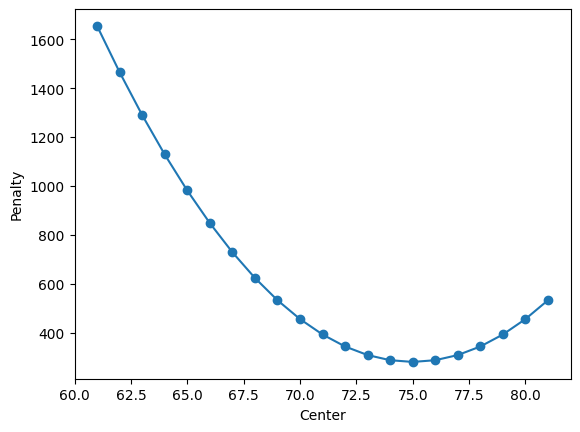

In [31]:
plt.xlabel('Center')
plt.ylabel('Penalty')
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)

In [32]:
min(penalties)

282

In [33]:
np.argmin(penalties)

14

In [34]:
penalties[14]

282

In [35]:
len(penalties)

21

In [36]:
least_penalized = 75

In [37]:
assert least_penalized == possible_centers[np.argmin(penalties)]

Text(0, 0.5, 'Temperature')

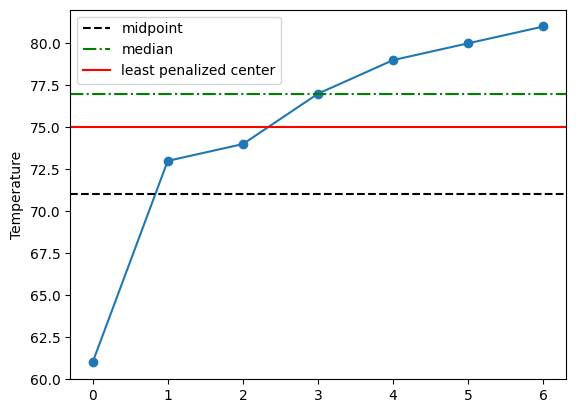

In [38]:
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--', label='midpoint')
plt.axhline(median, color='g', linestyle='-.', label='median')
plt.axhline(least_penalized, color='r', linestyle='-', label='least penalized center')
plt.legend()
plt.ylabel('Temperature')

In [39]:
assert measurements.mean() == least_penalized

In [40]:
num_flips = 20
interval_all_counts = range(num_flips + 1)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)

In [41]:
mean_binomial = np.average(interval_all_counts, weights=probabilities)

In [42]:
f"The mean of the binomial is {mean_binomial:.2f} heads"

'The mean of the binomial is 10.00 heads'

Text(0, 0.5, 'Probability')

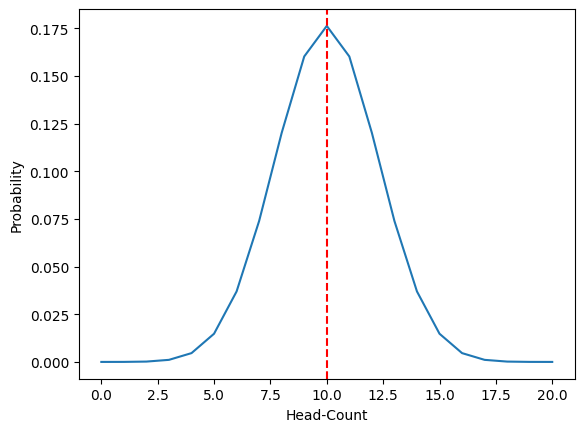

In [43]:
plt.plot(interval_all_counts, probabilities)
plt.axvline(mean_binomial, color='r', linestyle='--')
plt.xlabel('Head-Count')
plt.ylabel('Probability')

In [44]:
assert stats.binom.mean(num_flips, prob_head) == mean_binomial

Text(0, 0.5, 'Mean')

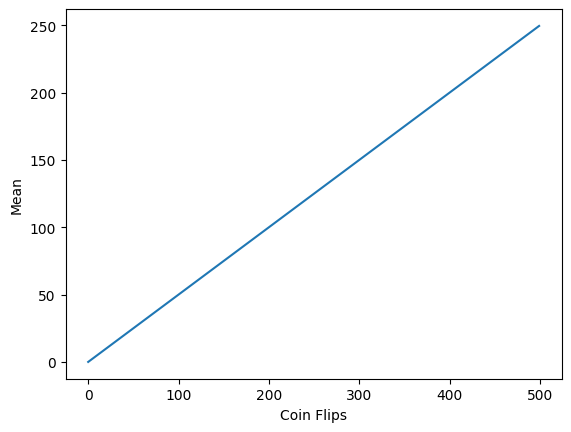

In [45]:
means = [stats.binom.mean(num_flips, .5) for num_flips in range(500)]
plt.plot(range(500), means)
plt.xlabel('Coin Flips')
plt.ylabel('Mean')

In [46]:
california = np.array([52, 77, 96])
kentucky = np.array([71, 75, 79])

In [47]:
f"Mean California temperature is {california.mean()}"

'Mean California temperature is 75.0'

In [48]:
f"Mean Kentucky temperature is {kentucky.mean()}"

'Mean Kentucky temperature is 75.0'

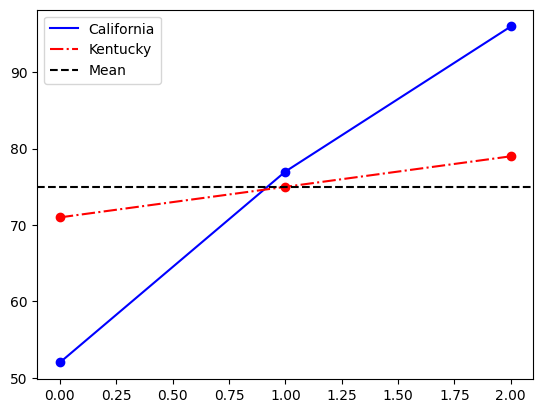

In [49]:
plt.plot(range(3), california, color='b', label='California')
plt.scatter(range(3), california, color='b')
plt.plot(range(3), kentucky, color='r', linestyle='-.', label='Kentucky')
plt.scatter(range(3), kentucky, color='r')
plt.axhline(75, color='k', linestyle='--', label='Mean')
plt.legend()

In [50]:
def sum_of_squares(data):
    mean = np.mean(data)
    return square_distance(data, mean).sum()


In [51]:
california_sum_squares = sum_of_squares(california)

In [52]:
california_sum_squares

974.0

In [53]:
kentucky_sum_squares = sum_of_squares(kentucky)

In [54]:
kentucky_sum_squares

32.0

In [55]:
def variance(data):
    mean = np.mean(data)
    return np.mean(square_distance(data, mean))

In [56]:
variance(california)

324.6666666666667

In [57]:
variance(kentucky)

10.666666666666666

In [58]:
california_variance = california.var()

In [59]:
california_variance

324.6666666666667

In [60]:
def weighted_variance(data, weights):
    mean = np.average(data, weights = weights)
    return np.average(square_distance(data, mean), weights = weights)

In [61]:
weighted_variance([75, 77], [9, 1]) == np.var(9 * [75] + [77])

True

In [62]:
interval_all_counts = range(21)

In [63]:
probabilities = stats.binom.pmf(interval_all_counts, 20, prob_head)

In [64]:
variance_binomal = weighted_variance(interval_all_counts, probabilities)

In [65]:
variance_binomal

5.0

Text(0, 0.5, 'Variance')

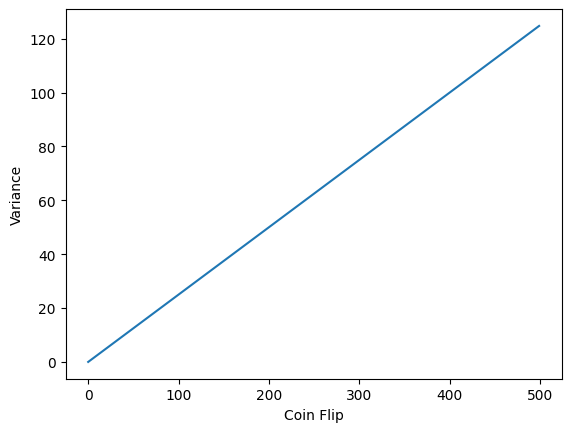

In [66]:
variances = [stats.binom.var(num_flips, prob_head) for num_flips in range(500)]
plt.plot(range(500), variances)
plt.xlabel('Coin Flip')
plt.ylabel('Variance')

In [67]:
np.random.seed(0)
sample_size = 10000
frequencies = np.random.binomial(sample_size, .5, 100000) / sample_size

In [68]:
sample_means = frequencies

Text(0, 0.5, 'Relative Likelihood')

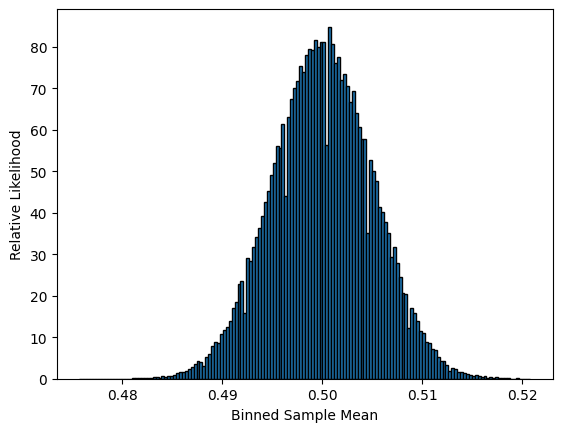

In [69]:
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', density=True, edgecolor='black')
plt.xlabel('Binned Sample Mean')
plt.ylabel('Relative Likelihood')

In [70]:
mean_normal = np.average(bin_edges[:-1], weights=likelihoods)
var_normal = weighted_variance(bin_edges[:-1], likelihoods)
std_normal = var_normal ** 0.5
print(f"Mean is approximately {mean_normal:.2f}")
print(f"Standard deviation is approximately {std_normal:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


In [71]:
var_normal

2.5045126615662126e-05

In [72]:
fitted_mean, fitted_std = stats.norm.fit(sample_means)

In [73]:
print(f"Mean is approximately {fitted_mean:.2f}")
print(f"Standard deviation is approximately {fitted_std:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


In [74]:
normal_likelihoods = stats.norm.pdf(bin_edges, fitted_mean, fitted_std)

In [75]:
normal_likelihoods

array([6.02844119e-04, 7.99654505e-04, 1.05709032e-03, 1.39262490e-03,
       1.82838886e-03, 2.39229826e-03, 3.11942417e-03, 4.05364667e-03,
       5.24964214e-03, 6.77525830e-03, 8.71433727e-03, 1.11700527e-02,
       1.42688321e-02, 1.81649408e-02, 2.30458055e-02, 2.91381617e-02,
       3.67151033e-02, 4.61041172e-02, 5.76961742e-02, 7.19559434e-02,
       8.94331807e-02, 1.10775325e-01, 1.36741310e-01, 1.68216577e-01,
       2.06229218e-01, 2.51967165e-01, 3.06796254e-01, 3.72278972e-01,
       4.50193592e-01, 5.42553366e-01, 6.51625341e-01, 7.79948303e-01,
       9.30349268e-01, 1.10595784e+00, 1.31021774e+00, 1.54689461e+00,
       1.82007937e+00, 2.13418606e+00, 2.49394332e+00, 2.90437861e+00,
       3.37079414e+00, 3.89873377e+00, 4.49394011e+00, 5.16230107e+00,
       5.90978565e+00, 6.74236840e+00, 7.66594285e+00, 8.68622403e+00,
       9.80864067e+00, 1.10382182e+01, 1.23794534e+01, 1.38361837e+01,
       1.54114505e+01, 1.71073627e+01, 1.89249596e+01, 2.08640785e+01,
      

Text(0, 0.5, 'Relative Likelihood')

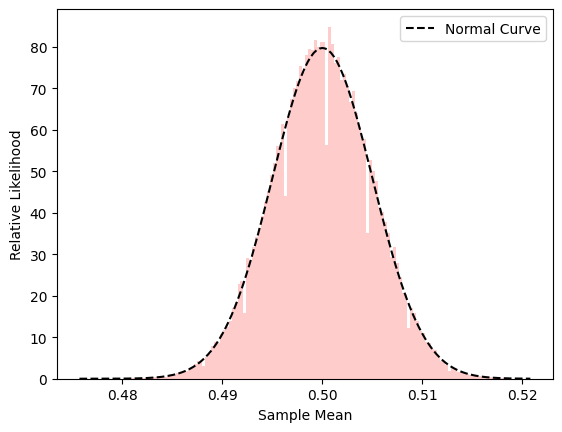

In [76]:
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--', label='Normal Curve')
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
plt.legend()
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')

Text(0, 0.5, 'Relative Likelihood')

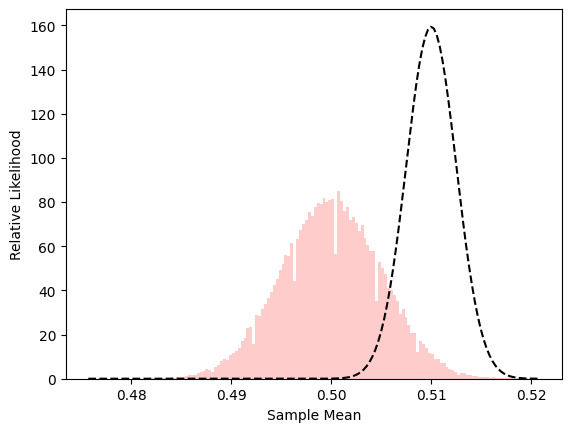

In [77]:
adjusted_likelihoods = stats.norm.pdf(bin_edges, fitted_mean + 0.01, fitted_std / 2)
plt.plot(bin_edges, adjusted_likelihoods, color='k', linestyle='--')
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')

Text(0, 0.5, 'Relative Likelihood')

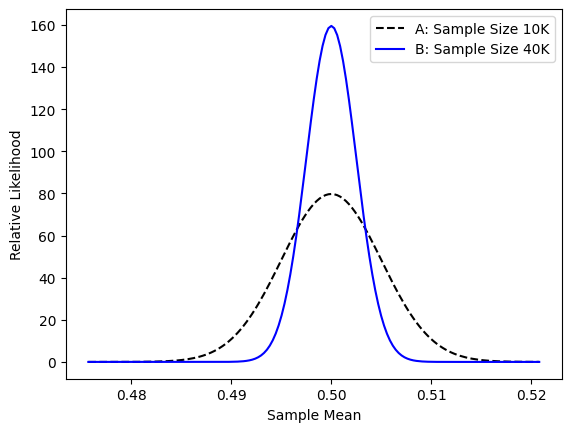

In [78]:
np.random.seed(0)
new_sample_size = 40000
new_head_counts = np.random.binomial(new_sample_size, 0.5, 100000)
new_mean, new_std = stats.norm.fit(new_head_counts / new_sample_size)
new_likelihoods = stats.norm.pdf(bin_edges, new_mean, new_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--',
label='A: Sample Size 10K')
plt.plot(bin_edges, new_likelihoods, color='b', label='B: Sample Size 40K')
plt.legend()
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')

In [79]:
mean, std = new_mean, new_std

In [80]:
start, end = stats.norm.interval(.95, mean, std)

In [81]:
start, end

(0.49510268777356603, 0.5049057472264338)

In [82]:
variance_ratio = (new_std ** 2) / (fitted_std ** 2)
print(f"The ratio of variances is approximately {variance_ratio:.2f}")

The ratio of variances is approximately 0.25


In [83]:
np.random.seed(0)
reduced_sample_size = 2500
head_counts = np.random.binomial(reduced_sample_size, 0.5, 100000)
_, std = stats.norm.fit(head_counts / reduced_sample_size)
variance_ratio = (std ** 2) / (fitted_std ** 2)
print(f"The ratio of variances is approximately {variance_ratio:.1f}")

The ratio of variances is approximately 4.0


In [84]:
estimated_variance = (fitted_std ** 2) * 10000
print(f"Estimated variance for a sample size of 1 is {estimated_variance:.2f}")

Estimated variance for a sample size of 1 is 0.25


In [85]:
sample_means

array([0.5002, 0.5028, 0.4991, ..., 0.4979, 0.4992, 0.4996])

In [86]:
assert stats.binom.var(1, .5) == .25

In [87]:
np.random.seed(0)
population_age = np.random.randint(1, 85, size=50000)

In [88]:
population_mean = population_age.mean()

In [89]:
population_age.var()

584.3333615344

In [90]:
np.random.seed(0)
sample_size = 10
sample = np.random.choice(population_age, sample_size)

In [91]:
sample_mean = sample.mean()

In [92]:
percent_diff = lambda v1, v2: 100 * abs(v1 - v2) / v2

In [93]:
percent_diff_mean = percent_diff(sample_mean, population_mean)

In [94]:
percent_diff_mean

27.585366977610708

In [95]:
np.random.seed(0)
sample_means = [np.random.choice(population_age, sample_size).mean() for _ in range(100)]

Text(0, 0.5, 'Relative Likelihood')

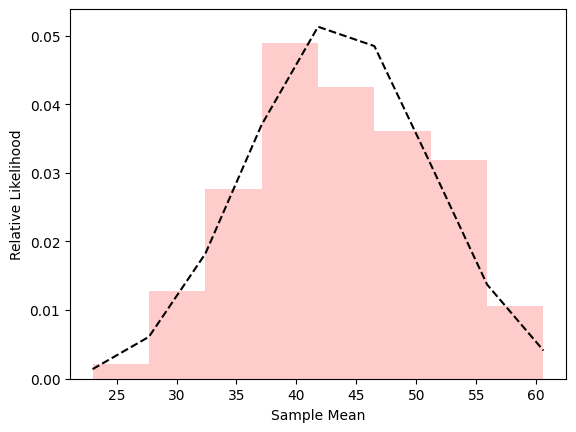

In [96]:
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', density=True, color='r', alpha=.2)
mean, std = stats.norm.fit(sample_means)
normal_likelihoods = stats.norm.pdf(bin_edges, mean, std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--')
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')

In [97]:
print(f"Actual population mean is approximately {population_mean:.2f}")
percent_diff_means = percent_diff(mean, population_mean)
print(f"There is a {percent_diff_means:.2f}% difference between means.")

Actual population mean is approximately 42.53
There is a 2.17% difference between means.


In [98]:
normal_variance = std ** 2
estimated_variance = normal_variance * sample_size


In [99]:
population_variance = population_age.var()
print(f"Estimated variance is approximately {estimated_variance:.2f}")
print(f"Actual population variance is approximately {population_variance:.2f}")
percent_diff_var = percent_diff(estimated_variance, population_variance)
print(f"There is a {percent_diff_var:.2f} percent difference between variances.")

Estimated variance is approximately 576.73
Actual population variance is approximately 584.33
There is a 1.30 percent difference between variances.


In [100]:
np.var([1,2,2,3])

0.5

In [101]:
l_mean, l_std = stats.norm.fit(population_age)

In [102]:
l_std

24.17298826240562

In [103]:
l_std ** 2

584.3333615344

In [104]:
population_mean = 84
population_variance = 25

In [105]:
mean = population_mean
population_std = population_variance ** .5

In [106]:
sem = population_std / (20 ** .5)

Text(0, 0.5, 'Relative Likelihood')

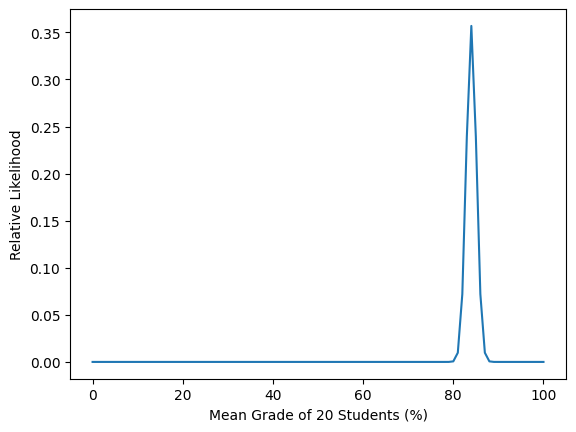

In [107]:
grade_range = range(101)
normal_likelihoods = stats.norm.pdf(grade_range, mean, sem)
plt.plot(grade_range, normal_likelihoods)
plt.xlabel('Mean Grade of 20 Students (%)')
plt.ylabel('Relative Likelihood')

In [108]:
normal_likelihoods

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 2.22329541e-322, 1.30097403e-307, 3.41071497e-293,
       4.01778452e-279, 2.12663163e-265, 5.05780769e-252, 5.40501333e-239,
       2.59534825e-226, 5.59962478e-214, 5.42858481e-202, 2.36471465e-190,
       4.62844675e-179, 4

In [109]:
total_area = np.sum([normal_likelihoods[i: i + 2].sum() / 2 for i in range(normal_likelihoods.size - 1)])

In [110]:
total_area

1.0000000000384808

In [111]:
np.trapz(normal_likelihoods)

1.0000000000384808

In [112]:
assert stats.norm.sf(0, mean, sem) == 1.

In [113]:
area = stats.norm.sf(90, mean, sem)

In [114]:
area

4.012555633463782e-08

In [115]:
population_mean = 80
population_variance = 100

In [116]:
mean = population_mean

In [117]:
sem = (population_variance / 18) ** .5

In [118]:
prob_high_grade = stats.norm.sf(84, mean, sem)

In [119]:
prob_high_grade

0.044843010885182284

In [120]:
prob_low_grade = stats.norm.cdf(76, mean, sem)
print(f"Probability of an average grade <= 76 is {prob_low_grade}")

Probability of an average grade <= 76 is 0.044843010885182284


In [121]:
for x in range(-100, 100):
    sf_value = stats.norm.sf(mean + x, mean, sem)
    assert sf_value == stats.norm.cdf(mean - x, mean, sem)

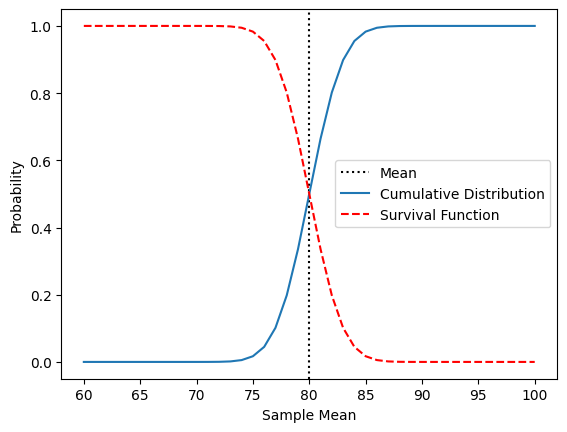

In [122]:
plt.axvline(mean, color='k', label='Mean', linestyle=':')
x_values = range(60, 101)
plt.plot(x_values, stats.norm.cdf(x_values, mean, sem), label='Cumulative Distribution')
plt.plot(x_values, stats.norm.sf(x_values, mean, sem), label='Survival Function', linestyle='--', color='r')
plt.xlabel('Sample Mean')
plt.ylabel('Probability')
plt.legend()

In [123]:
p_value = prob_low_grade + prob_high_grade
assert p_value == 2 * prob_high_grade
print(f"The p-value is {p_value}")

The p-value is 0.08968602177036457


In [124]:
def compute_p_value(observed_mean, population_mean, sem):
    mean_diff = abs(population_mean - observed_mean)
    prob_high = stats.norm.sf(population_mean + mean_diff, population_mean, sem)
    return 2 * prob_high
new_p_value = compute_p_value(85, mean, sem)
print(f"The updated p-value is {new_p_value}")

for grade in range(80, 100):
    p_value = compute_p_value(grade, mean, sem)
    if p_value < 0.001:
        break
print(f"An average grade of {grade} leads to a p-value of {p_value}")

The updated p-value is 0.03389485352468927
An average grade of 88 leads to a p-value of 0.0006885138966450773


In [125]:
mean

80

In [126]:
np.random.seed(0)
random_average_grade = np.random.normal(mean, sem)

In [127]:
random_average_grade

84.15791125400591

In [128]:
np.random.seed(0)
for i in range(1, 49):
    print(f"We visited state {i+1}")
    random_average_grade = np.random.normal(mean, sem)
    p_value = compute_p_value(random_average_grade, mean, sem)
    if p_value <= .05:
        print("We found a statistically significant result.")
        print(f"The average grade was {random_average_grade:.2f}")
        print(f"The p-value was {p_value}")
        break
if i == 48:
    print("We visited every state and found no significant results.")

We visited state 2
We visited state 3
We visited state 4
We visited state 5
We found a statistically significant result.
The average grade was 85.28
The p-value was 0.025032993883401307


In [129]:
num_planned_experiments = 49
significance_level = .05 / num_planned_experiments

In [130]:
np.random.seed(0)
for i in range(49):
    print(f"We visited state {i+1}")
    random_average_grade = np.random.normal(mean, sem)
    p_value = compute_p_value(random_average_grade, mean, sem)
    if p_value <= significance_level:
        print("We found a statistically significant result.")
        print(f"The average grade was {random_average_grade:.2f}")
        print(f"The p-value was {p_value}")
        break
if i == 48:
    print("We visited every state and found no significant results.")

We visited state 1
We visited state 2
We visited state 3
We visited state 4
We visited state 5
We visited state 6
We visited state 7
We visited state 8
We visited state 9
We visited state 10
We visited state 11
We visited state 12
We visited state 13
We visited state 14
We visited state 15
We visited state 16
We visited state 17
We visited state 18
We visited state 19
We visited state 20
We visited state 21
We visited state 22
We visited state 23
We visited state 24
We visited state 25
We visited state 26
We visited state 27
We visited state 28
We visited state 29
We visited state 30
We visited state 31
We visited state 32
We visited state 33
We visited state 34
We visited state 35
We visited state 36
We visited state 37
We visited state 38
We visited state 39
We visited state 40
We visited state 41
We visited state 42
We visited state 43
We visited state 44
We visited state 45
We visited state 46
We visited state 47
We visited state 48
We visited state 49
We visited every state and fo

In [131]:
fish_lengths = np.array([46.7, 17.1, 2.0, 19.2, 7.9, 15.0, 43.4, 8.8, 47.8, 19.5, 2.9, 53.0, 23.5, 118.5, 3.8, 2.9, 53.9, 23.9, 2.0, 28.2])

In [132]:
assert fish_lengths.mean() == 27

In [133]:
np.random.seed(0)
random_fish_length = np.random.choice(fish_lengths, size=1)[0]
sampled_fish_lengths = [random_fish_length]

In [134]:
sampled_fish_lengths

[23.5]

In [135]:
np.random.seed(0)
for _ in range(20):
    random_fish_length = np.random.choice(fish_lengths, size=1)[0]
    sampled_fish_lengths.append(random_fish_length)

In [136]:
np.random.seed(0)
new_sampled_fish_lengths = np.random.choice(fish_lengths, size=20, replace=True)
new_sample_mean = new_sampled_fish_lengths.mean()
print(f"Mean of the new sampled fish lengths is {new_sample_mean:.2f} cm")

Mean of the new sampled fish lengths is 26.16 cm


Text(0, 0.5, 'Relative Likelihood')

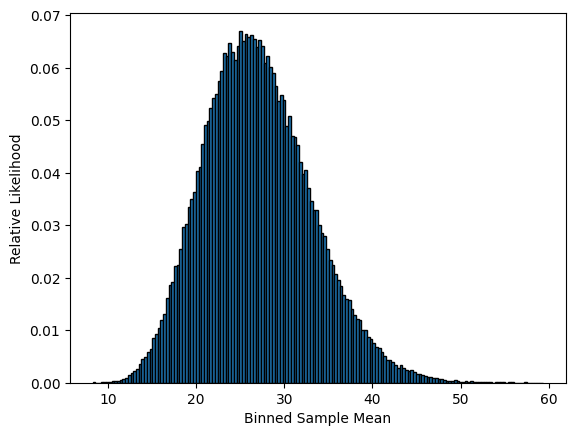

In [137]:
np.random.seed(0)
sample_means = [np.random.choice(fish_lengths, size=20, replace=True).mean() for _ in range(150000)]
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', edgecolor='black', density=True)
plt.xlabel('Binned Sample Mean')
plt.ylabel('Relative Likelihood')

In [138]:
stats.skew(sample_means)

0.40940145472782613

In [139]:
random_variable = stats.rv_histogram((likelihoods, bin_edges))

Text(0, 0.5, 'Relative Likelihood')

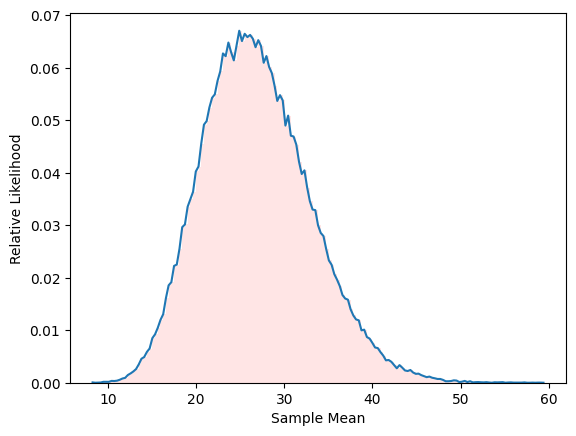

In [140]:
plt.plot(bin_edges, random_variable.pdf(bin_edges))
plt.hist(sample_means, bins='auto', alpha=0.1, color='r', density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')

Mean of the distribution is approximately 27.00 cm


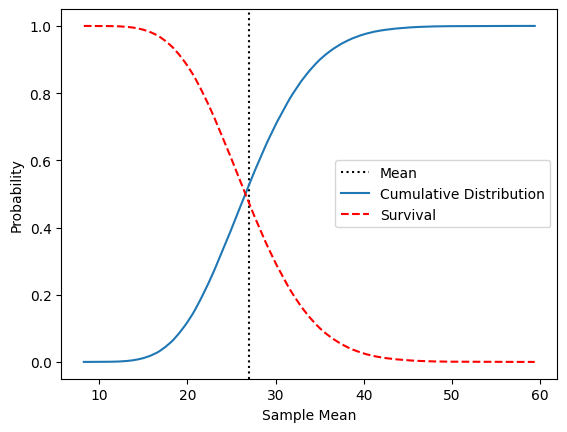

In [141]:
rv_mean = random_variable.mean()
print(f"Mean of the distribution is approximately {rv_mean:.2f} cm")
plt.axvline(random_variable.mean(), color='k', label='Mean', linestyle=':')
plt.plot(bin_edges, random_variable.cdf(bin_edges), label='Cumulative Distribution')
plt.plot(bin_edges, random_variable.sf(bin_edges),
label='Survival', linestyle='--', color='r')
plt.xlabel('Sample Mean')
plt.ylabel('Probability')
plt.legend()

In [142]:
prob_extreme= random_variable.sf(37) + random_variable.cdf(17)
print("Probability of observing an extreme sample mean is approximately " f"{prob_extreme:.2f}")

Probability of observing an extreme sample mean is approximately 0.10


In [143]:
fish_lengths.mean()

27.0

In [144]:
new_fish_lengths = np.array([51, 46.5, 51.6, 47, 54.4, 40.5, 43, 43.1, 35.9, 47.0])
assert new_fish_lengths.mean() == 46

In [145]:
total_fish_lengths = np.hstack((fish_lengths, new_fish_lengths))

In [146]:
total_fish_lengths.size

30

In [147]:
np.random.seed(0)
np.random.shuffle(total_fish_lengths)

In [148]:
total_fish_lengths

array([  2. ,  35.9, 118.5,   2.9,  43. ,  54.4,  43.1,  53. ,  23.9,
        51.6,  15. ,  53.9,  47.8,   3.8,  47. ,  51. ,  17.1,  47. ,
        43.4,   7.9,   2. ,  28.2,  19.5,   8.8,  40.5,  19.2,  46.7,
        46.5,   2.9,  23.5])

In [149]:
random_20_fish_lengths = total_fish_lengths[:20]
random_10_fish_lengths = total_fish_lengths[20:]

In [150]:
mean_diff = random_20_fish_lengths.mean() - random_10_fish_lengths.mean()

In [151]:
mean_diff

14.329999999999998

In [152]:
np.random.seed(0)
mean_diffs = []
for _ in range(30000):
    np.random.shuffle(total_fish_lengths)
    mean_diff = total_fish_lengths[:20].mean() - total_fish_lengths[20:].mean()
    mean_diffs.append(mean_diff)

Text(0, 0.5, 'Relative Likelihood')

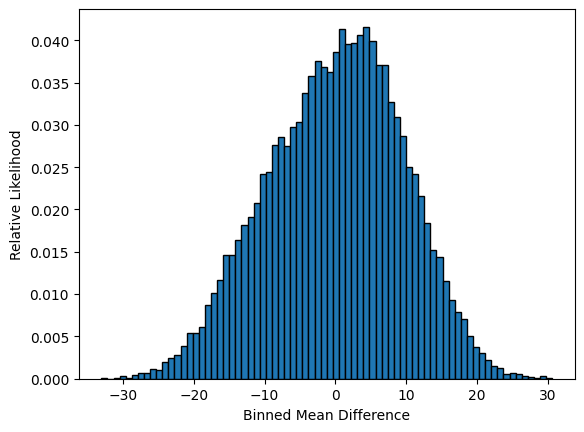

In [153]:
likelihoods, bin_edges, _ = plt.hist(mean_diffs, bins='auto', edgecolor='black', density=True)
plt.xlabel('Binned Mean Difference')
plt.ylabel('Relative Likelihood')

In [154]:
random_variable = stats.rv_histogram((likelihoods, bin_edges))

In [155]:
p_value = random_variable.sf(19) + random_variable.cdf(-19)
print(f"P-value is approximately {p_value:.2f}")

P-value is approximately 0.04


In [156]:
fish_measures = {'Fish': ['Angelfish', 'Zebrafish', 'Killifish', 'Swordtail'], 'Length':[15.2, 6.5, 9, 6], 'Width': [7.7, 2.1, 4.5, 2]}

In [157]:
import pandas as pd

In [158]:
zebrafish_index = fish_measures['Fish'].index('Zebrafish')

In [159]:
zebrafish_index

1

In [160]:
fish_measures['Fish'][zebrafish_index]

'Zebrafish'

In [161]:
df = pd.DataFrame(fish_measures)

In [162]:
df

,Fish,Length,Width
0,Angelfish,15.2,7.7
1,Zebrafish,6.5,2.1
2,Killifish,9.0,4.5
3,Swordtail,6.0,2.0


In [163]:
df.describe()

,Length,Width
count,4.000000,4.000000
mean,9.175000,4.075000
std,4.225616,2.678775
min,6.000000,2.000000
25%,6.375000,2.075000
50%,7.750000,3.300000
75%,10.550000,5.300000
max,15.200000,7.700000


In [164]:
df.mean()

/tmp/ipykernel_7456/3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Length    9.175
Width     4.075
dtype: float64

In [165]:
df.describe(include=[np.object_])

,Fish
count,4
unique,4
top,Angelfish
freq,1


In [166]:
df.values

array([['Angelfish', 15.2, 7.7],
       ['Zebrafish', 6.5, 2.1],
       ['Killifish', 9.0, 4.5],
       ['Swordtail', 6.0, 2.0]], dtype=object)

In [167]:
df.columns

Index(['Fish', 'Length', 'Width'], dtype='object')

In [168]:
df['Fish'].values

array(['Angelfish', 'Zebrafish', 'Killifish', 'Swordtail'], dtype=object)

In [169]:
df

,Fish,Length,Width
0,Angelfish,15.2,7.7
1,Zebrafish,6.5,2.1
2,Killifish,9.0,4.5
3,Swordtail,6.0,2.0


In [170]:
df.sort_values('Length')

,Fish,Length,Width
3,Swordtail,6.0,2.0
1,Zebrafish,6.5,2.1
2,Killifish,9.0,4.5
0,Angelfish,15.2,7.7


In [171]:
df[df.Width >= 3]

,Fish,Length,Width
0,Angelfish,15.2,7.7
2,Killifish,9.0,4.5


In [172]:
df.loc[[0, 3]]

,Fish,Length,Width
0,Angelfish,15.2,7.7
3,Swordtail,6.0,2.0


In [173]:
df[df['Fish'].isin(['Angelfish', 'Swordtail'])]

,Fish,Length,Width
0,Angelfish,15.2,7.7
3,Swordtail,6.0,2.0


In [174]:
df.set_index('Fish', inplace=True)

In [175]:
df

,Length,Width
Fish,,
Angelfish,15.2,7.7
Zebrafish,6.5,2.1
Killifish,9.0,4.5
Swordtail,6.0,2.0


In [176]:
df_tranposed = df.T

In [177]:
df_tranposed.Swordtail

Length    6.0
Width     2.0
Name: Swordtail, dtype: float64

In [178]:
df_tranposed['Clownfish'] = [10.6, 3.7]

In [179]:
df_tranposed

Fish,Angelfish,Zebrafish,Killifish,Swordtail,Clownfish
Length,15.2,6.5,9.0,6.0,10.6
Width,7.7,2.1,4.5,2.0,3.7


In [180]:
df_new = df_tranposed.assign(Clownfish2=[10.6, 3.7], Clownfish3=[10.6, 3.7])

In [181]:
df_new

Fish,Angelfish,Zebrafish,Killifish,Swordtail,Clownfish,Clownfish2,Clownfish3
Length,15.2,6.5,9.0,6.0,10.6,10.6,10.6
Width,7.7,2.1,4.5,2.0,3.7,3.7,3.7


In [182]:
df_new.drop(columns=['Clownfish2', 'Clownfish3'], inplace=True)

In [183]:
df_new

Fish,Angelfish,Zebrafish,Killifish,Swordtail,Clownfish
Length,15.2,6.5,9.0,6.0,10.6
Width,7.7,2.1,4.5,2.0,3.7


In [184]:
areas = []
for fish_species, (length, width) in df_new.items():
    area = np.pi * length * width / 4
    print(f'Area of {fish_species} is {area}')
    areas.append(area)

Area of Angelfish is 91.92300104403735
Area of Zebrafish is 10.720684930375171
Area of Killifish is 31.808625617596654
Area of Swordtail is 9.42477796076938
Area of Clownfish is 30.80331596844792


In [185]:
df_new.loc['Area'] = areas

In [186]:
df_new.reindex()

Fish,Angelfish,Zebrafish,Killifish,Swordtail,Clownfish
Length,15.200000,6.500000,9.000000,6.000000,10.600000
Width,7.700000,2.100000,4.500000,2.000000,3.700000
Area,91.923001,10.720685,31.808626,9.424778,30.803316


In [187]:
df_new

Fish,Angelfish,Zebrafish,Killifish,Swordtail,Clownfish
Length,15.200000,6.500000,9.000000,6.000000,10.600000
Width,7.700000,2.100000,4.500000,2.000000,3.700000
Area,91.923001,10.720685,31.808626,9.424778,30.803316


In [188]:
import seaborn as sns

In [189]:
df_new

Fish,Angelfish,Zebrafish,Killifish,Swordtail,Clownfish
Length,15.200000,6.500000,9.000000,6.000000,10.600000
Width,7.700000,2.100000,4.500000,2.000000,3.700000
Area,91.923001,10.720685,31.808626,9.424778,30.803316


<Axes: xlabel='Fish'>

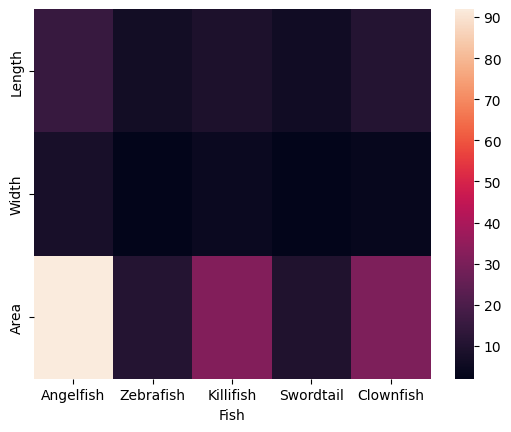

In [190]:
sns.heatmap(df_new)

<Axes: xlabel='Fish'>

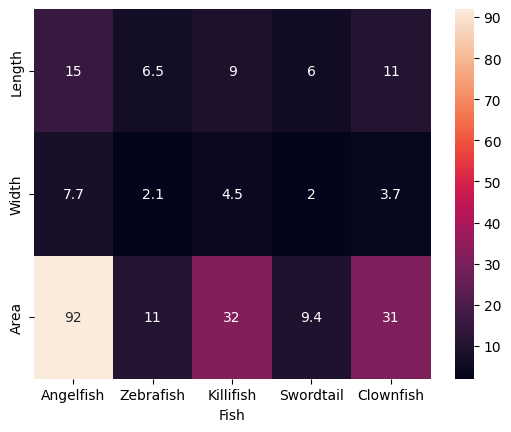

In [191]:
sns.heatmap(df_new, annot=True)

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Length'), Text(0, 1.5, 'Width'), Text(0, 2.5, 'Area')])

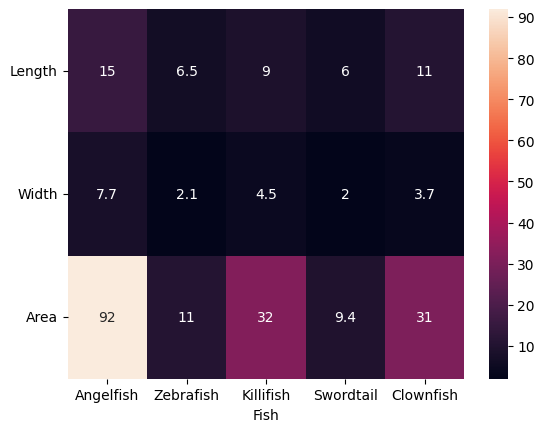

In [192]:
sns.heatmap(df_new, annot=True)
plt.yticks(rotation=0)

In [193]:
df = pd.read_csv('Case_Study2/colored_ad_click_table.csv')

In [194]:
df

,Color,Click Count: Day 1,View Count: Day 1,Click Count: Day 2,View Count: Day 2,Click Count: Day 3,View Count: Day 3,Click Count: Day 4,View Count: Day 4,Click Count: Day 5,...,Click Count: Day 16,View Count: Day 16,Click Count: Day 17,View Count: Day 17,Click Count: Day 18,View Count: Day 18,Click Count: Day 19,View Count: Day 19,Click Count: Day 20,View Count: Day 20
0,Pink,21,100,20,100,14,100,30,100,12,...,23,100,15,100,22,100,19,100,20,100
1,Gray,27,100,27,100,26,100,17,100,29,...,25,100,21,100,27,100,25,100,24,100
2,Sapphire,30,100,32,100,30,100,26,100,32,...,33,100,30,100,30,100,30,100,25,100
3,Purple,26,100,21,100,16,100,17,100,23,...,22,100,20,100,26,100,25,100,33,100
4,Coral,26,100,24,100,25,100,27,100,36,...,26,100,21,100,22,100,26,100,25,100
5,Olive,26,100,19,100,20,100,23,100,27,...,16,100,21,100,23,100,26,100,26,100
6,Navy,38,100,29,100,30,100,32,100,29,...,37,100,30,100,25,100,31,100,41,100
7,Maroon,21,100,29,100,24,100,22,100,22,...,21,100,22,100,32,100,25,100,20,100
8,Teal,25,100,25,100,32,100,28,100,25,...,35,100,23,100,26,100,32,100,24,100
9,Cyan,24,100,22,100,34,100,23,100,23,...,29,100,26,100,33,100,37,100,33,100


In [195]:
df.columns

Index(['Color', 'Click Count: Day 1', 'View Count: Day 1',
       'Click Count: Day 2', 'View Count: Day 2', 'Click Count: Day 3',
       'View Count: Day 3', 'Click Count: Day 4', 'View Count: Day 4',
       'Click Count: Day 5', 'View Count: Day 5', 'Click Count: Day 6',
       'View Count: Day 6', 'Click Count: Day 7', 'View Count: Day 7',
       'Click Count: Day 8', 'View Count: Day 8', 'Click Count: Day 9',
       'View Count: Day 9', 'Click Count: Day 10', 'View Count: Day 10',
       'Click Count: Day 11', 'View Count: Day 11', 'Click Count: Day 12',
       'View Count: Day 12', 'Click Count: Day 13', 'View Count: Day 13',
       'Click Count: Day 14', 'View Count: Day 14', 'Click Count: Day 15',
       'View Count: Day 15', 'Click Count: Day 16', 'View Count: Day 16',
       'Click Count: Day 17', 'View Count: Day 17', 'Click Count: Day 18',
       'View Count: Day 18', 'Click Count: Day 19', 'View Count: Day 19',
       'Click Count: Day 20', 'View Count: Day 20'],
      dtyp

In [196]:
df['Color'].values

array(['Pink', 'Gray', 'Sapphire', 'Purple', 'Coral', 'Olive', 'Navy',
       'Maroon', 'Teal', 'Cyan', 'Orange', 'Black', 'Tan', 'Red', 'Blue',
       'Brown', 'Turquoise', 'Indigo', 'Gold', 'Jade', 'Ultramarine',
       'Yellow', 'Virdian', 'Violet', 'Green', 'Aquamarine', 'Magenta',
       'Silver', 'Bronze', 'Lime'], dtype=object)

In [197]:
selected_columns = ['Color', 'Click Count: Day 1', 'View Count: Day 1']

In [198]:
df[selected_columns]

,Color,Click Count: Day 1,View Count: Day 1
0,Pink,21,100
1,Gray,27,100
2,Sapphire,30,100
3,Purple,26,100
4,Coral,26,100
5,Olive,26,100
6,Navy,38,100
7,Maroon,21,100
8,Teal,25,100
9,Cyan,24,100


In [199]:
view_columns = [column for column in df.columns if 'View' in column]

In [200]:
view_columns

['View Count: Day 1',
 'View Count: Day 2',
 'View Count: Day 3',
 'View Count: Day 4',
 'View Count: Day 5',
 'View Count: Day 6',
 'View Count: Day 7',
 'View Count: Day 8',
 'View Count: Day 9',
 'View Count: Day 10',
 'View Count: Day 11',
 'View Count: Day 12',
 'View Count: Day 13',
 'View Count: Day 14',
 'View Count: Day 15',
 'View Count: Day 16',
 'View Count: Day 17',
 'View Count: Day 18',
 'View Count: Day 19',
 'View Count: Day 20']

In [201]:
np.all(df[view_columns].values == 100)

True

In [202]:
df.drop(columns=view_columns, inplace=True)

In [203]:
df

,Color,Click Count: Day 1,Click Count: Day 2,Click Count: Day 3,Click Count: Day 4,Click Count: Day 5,Click Count: Day 6,Click Count: Day 7,Click Count: Day 8,Click Count: Day 9,...,Click Count: Day 11,Click Count: Day 12,Click Count: Day 13,Click Count: Day 14,Click Count: Day 15,Click Count: Day 16,Click Count: Day 17,Click Count: Day 18,Click Count: Day 19,Click Count: Day 20
0,Pink,21,20,14,30,12,23,26,21,16,...,21,16,30,24,17,23,15,22,19,20
1,Gray,27,27,26,17,29,27,19,21,28,...,23,21,18,18,18,25,21,27,25,24
2,Sapphire,30,32,30,26,32,29,21,26,28,...,33,22,27,29,38,33,30,30,30,25
3,Purple,26,21,16,17,23,17,21,30,15,...,17,20,24,19,24,22,20,26,25,33
4,Coral,26,24,25,27,36,30,36,31,31,...,37,25,21,23,20,26,21,22,26,25
5,Olive,26,19,20,23,27,11,24,18,22,...,26,24,15,17,10,16,21,23,26,26
6,Navy,38,29,30,32,29,22,29,30,25,...,26,30,27,23,29,37,30,25,31,41
7,Maroon,21,29,24,22,22,23,22,16,26,...,17,24,19,29,22,21,22,32,25,20
8,Teal,25,25,32,28,25,24,31,28,29,...,33,28,29,39,26,35,23,26,32,24
9,Cyan,24,22,34,23,23,31,28,31,26,...,27,28,35,16,30,29,26,33,37,33


In [204]:
df.set_index('Color', inplace=True)

In [205]:
df

,Click Count: Day 1,Click Count: Day 2,Click Count: Day 3,Click Count: Day 4,Click Count: Day 5,Click Count: Day 6,Click Count: Day 7,Click Count: Day 8,Click Count: Day 9,Click Count: Day 10,Click Count: Day 11,Click Count: Day 12,Click Count: Day 13,Click Count: Day 14,Click Count: Day 15,Click Count: Day 16,Click Count: Day 17,Click Count: Day 18,Click Count: Day 19,Click Count: Day 20
Color,,,,,,,,,,,,,,,,,,,,
Pink,21,20,14,30,12,23,26,21,16,21,21,16,30,24,17,23,15,22,19,20
Gray,27,27,26,17,29,27,19,21,28,24,23,21,18,18,18,25,21,27,25,24
Sapphire,30,32,30,26,32,29,21,26,28,27,33,22,27,29,38,33,30,30,30,25
Purple,26,21,16,17,23,17,21,30,15,26,17,20,24,19,24,22,20,26,25,33
Coral,26,24,25,27,36,30,36,31,31,26,37,25,21,23,20,26,21,22,26,25
Olive,26,19,20,23,27,11,24,18,22,29,26,24,15,17,10,16,21,23,26,26
Navy,38,29,30,32,29,22,29,30,25,23,26,30,27,23,29,37,30,25,31,41
Maroon,21,29,24,22,22,23,22,16,26,26,17,24,19,29,22,21,22,32,25,20
Teal,25,25,32,28,25,24,31,28,29,27,33,28,29,39,26,35,23,26,32,24


In [206]:
df.T.Blue

Click Count: Day 1     29
Click Count: Day 2     30
Click Count: Day 3     27
Click Count: Day 4     27
Click Count: Day 5     42
Click Count: Day 6     33
Click Count: Day 7     29
Click Count: Day 8     18
Click Count: Day 9     27
Click Count: Day 10    21
Click Count: Day 11    28
Click Count: Day 12    24
Click Count: Day 13    27
Click Count: Day 14    30
Click Count: Day 15    39
Click Count: Day 16    26
Click Count: Day 17    31
Click Count: Day 18    31
Click Count: Day 19    23
Click Count: Day 20    25
Name: Blue, dtype: int64

In [207]:
df_not_blue = df.T.drop(columns=['Blue'])

In [208]:
df_not_blue

Color,Pink,Gray,Sapphire,Purple,Coral,Olive,Navy,Maroon,Teal,Cyan,...,Ultramarine,Yellow,Virdian,Violet,Green,Aquamarine,Magenta,Silver,Bronze,Lime
Click Count: Day 1,21,27,30,26,26,26,38,21,25,24,...,49,14,27,15,14,24,18,26,19,20
Click Count: Day 2,20,27,32,21,24,19,29,29,25,22,...,41,24,23,22,25,28,21,24,19,19
Click Count: Day 3,14,26,30,16,25,20,30,24,32,34,...,24,20,24,22,29,25,23,18,27,22
Click Count: Day 4,30,17,26,17,27,23,32,22,28,23,...,36,17,22,20,30,35,19,32,18,26
Click Count: Day 5,12,29,32,23,36,27,29,22,25,23,...,34,18,22,26,26,31,21,32,19,29
Click Count: Day 6,23,27,29,17,30,11,22,23,24,31,...,31,26,23,14,23,37,23,23,22,27
Click Count: Day 7,26,19,21,21,36,24,29,22,31,28,...,31,25,27,24,22,27,18,16,27,20
Click Count: Day 8,21,21,26,30,31,18,30,16,28,31,...,36,24,25,21,31,31,22,14,13,20
Click Count: Day 9,16,28,28,15,31,22,25,26,29,26,...,44,22,19,19,23,30,16,19,23,29
Click Count: Day 10,21,24,27,26,26,29,23,26,27,25,...,35,22,18,20,17,30,31,16,30,16


In [209]:
def permutation_test(data_array_a, data_array_b):
    data_mean_a = data_array_a.mean()
    data_mean_b = data_array_b.mean()
    extreme_mean_diff = np.abs(data_mean_b - data_mean_a)
    total_data = np.hstack([data_array_a, data_array_b])
    number_extreme_values = 0.0
    for _ in range(30000):
        np.random.shuffle(total_data)
        sample_a = total_data[:data_array_a.size]
        sample_b = total_data[data_array_a.size:]
        if abs(sample_a.mean() - sample_b.mean())>=extreme_mean_diff:
            number_extreme_values += 1
    p_value = number_extreme_values / 30000
    return p_value

In [210]:
np.random.seed(0)
blue_clicks = df.T.Blue.values
color_to_p_value = {}
for color, color_clicks in df_not_blue.items():
    p_value = permutation_test(blue_clicks, color_clicks)
    color_to_p_value[color] = p_value

In [211]:
sorted_colors, sorted_p_values = zip(*sorted(color_to_p_value.items(), key=lambda x: x[1]))

In [212]:
sorted_colors

('Black',
 'Lime',
 'Pink',
 'Olive',
 'Magenta',
 'Silver',
 'Orange',
 'Red',
 'Yellow',
 'Bronze',
 'Jade',
 'Purple',
 'Tan',
 'Brown',
 'Violet',
 'Indigo',
 'Virdian',
 'Maroon',
 'Gold',
 'Gray',
 'Ultramarine',
 'Green',
 'Coral',
 'Navy',
 'Aquamarine',
 'Sapphire',
 'Turquoise',
 'Cyan',
 'Teal')

<Axes: >

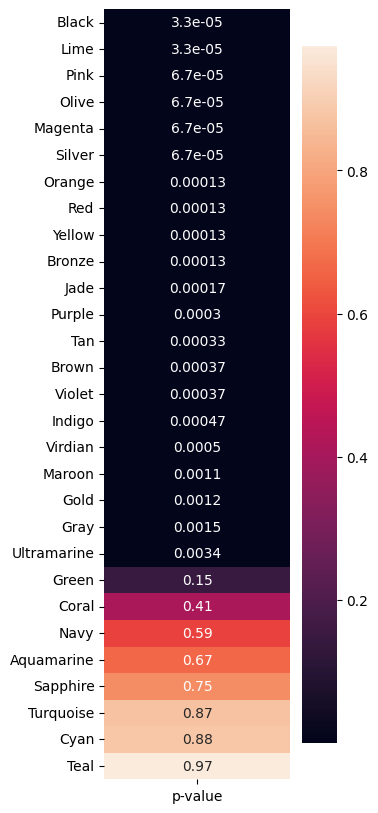

In [213]:
plt.figure(figsize=(3, 10))
sns.heatmap([[p_value] for p_value in sorted_p_values], annot=True, xticklabels=['p-value'], yticklabels=sorted_colors)

In [214]:
remaining_colors = df[df.T.mean().values > blue_clicks.mean()].index

In [215]:
remaining_colors

Index(['Sapphire', 'Navy', 'Teal', 'Ultramarine', 'Aquamarine'], dtype='object', name='Color')

In [216]:
for color, p_value in sorted(color_to_p_value.items(), key=lambda x: x[1]):
    if color in remaining_colors:
        mean = df_not_blue[color].mean()
        print(f"{color} has a p-value of {p_value} and a mean of {mean}")

Ultramarine has a p-value of 0.0034 and a mean of 34.2
Navy has a p-value of 0.5911666666666666 and a mean of 29.3
Aquamarine has a p-value of 0.6654666666666667 and a mean of 29.2
Sapphire has a p-value of 0.7457666666666667 and a mean of 28.9
Teal has a p-value of 0.9745 and a mean of 28.45


In [217]:
significance_level = 0.05 / 29
print(f"Adjusted significance level is {significance_level}")
if color_to_p_value['Ultramarine'] <= significance_level:
    print("Our p-value is statistically significant")
else:
    print("Our p-value is not statistically significant")

Adjusted significance level is 0.001724137931034483
Our p-value is not statistically significant
